# Small example tensor-network codes and code distances

Note that running each function for the first time will include compilation time.  This can be a little slow for plots.

In [1]:
using ITensors, Random, StatsPlots, LightGraphs, GraphPlot, NBInclude
using SimpleCodes, TNCodes
# include("Packages/SimpleCodes/src/SimpleCodes.jl")
# using ..SimpleCodes
# include("Packages/TNCodes/src/TNCodes.jl")
# using ..TNCodes

# folder = "Packages/SimpleCodes/src/"
# include(folder*"Code_types.jl")
# include(folder*"Code_functions.jl")
# include(folder*"Code_functions_advanced.jl")
# include(folder*"Code_examples.jl")
# include(folder*"Code_decoding.jl")
# include(folder*"Code_errors.jl")

# folder = "Packages/TNCodes/src/"
# include(folder*"TN_code_types.jl")
# include(folder*"TN_code_plotting.jl")
# include(folder*"TN_code_functions.jl")
# include(folder*"TN_code_contract.jl")
# include(folder*"TN_surface.jl")

@nbinclude("TN_distance.ipynb")

operator_weights_plot

## Let's make a new little code

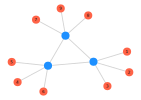

In [3]:
# Start with the five-qubit code
new_code = TNCode(five_qubit_code())

# Contract with another five-qubit code
new_code = TNCodes.contract(
    new_code,
    TNCode(five_qubit_code()),
    [[5,1]]); # we're contracting leg 5 of the first code with leg 1 of the second

# Contract with another five-qubit code
new_code = TNCodes.contract(
    new_code,
    TNCode(five_qubit_code()),
    [[8,1]]);

# Contract two existing legs
new_code = fusion(new_code,[1,11])


# Let's see what the code looks like
code_plot(new_code;use_coords=false)

## Calculate distance

In [4]:
dist = TN_distance(new_code)
n = size(new_code)
k = Int64(length(new_code.logicals)/2)


println("This is a [[$n,$k,$dist]] code!")

This is a [[9,3,3]] code!


## How are the logical operators and stabilizers are distributed by weight?

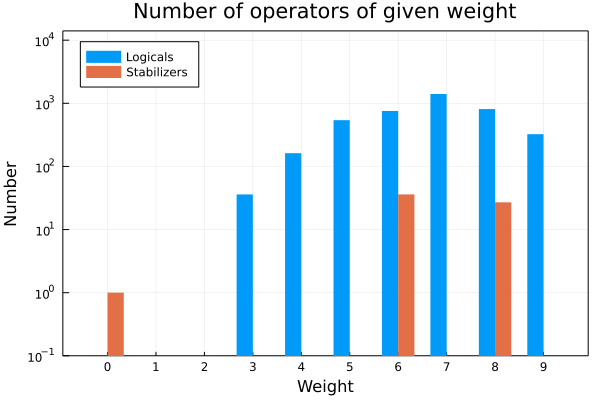

In [5]:
new_op_weights = TN_operator_weights(new_code)
operator_weights_plot(new_op_weights)

## Let's try another example

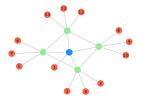

In [6]:
bigger_code = TNCode(five_qubit_code())
ψ = TNCode(purify_code(five_qubit_code())) # six-qubit stabilizer state

bigger_code = TNCodes.contract(
    bigger_code,
    TNCode(purify_code(five_qubit_code())),
    [[1,4]])

bigger_code = TNCodes.contract(
    bigger_code,
    TNCode(purify_code(five_qubit_code())),
    [[1,4]])

bigger_code = TNCodes.contract(
    bigger_code,
    TNCode(purify_code(five_qubit_code())),
    [[8,4],[3,2]])

bigger_code = TNCodes.contract(
    bigger_code,
    TNCode(purify_code(five_qubit_code())),
    [[13,4],[7,1],[2,2]])

bigger_code = fusion(bigger_code,[7,3])


# This extra contraction gives a code with the same distance but fewer physical qubits
# bigger_code = TNCodes.fusion(bigger_code,[2,3])


# Let's see what this looks like (re-run if the plot looks weird)
code_plot(bigger_code,use_coords = false)

## Let's find the code distance (re-run to eliminate compilation time)

In [9]:
@time bigger_code_weights = TN_operator_weights(bigger_code)

# Compare time to (brute-force search) distance function
# Run twice to discount compilation time!
@time bf_dist = distance(bigger_code)[1]


dist2 = bigger_code_weights.distance
n2 = size(bigger_code)
k2 = Int(length(bigger_code.logicals)/2)


println("This is a [[$n2,$k2,$dist2]] code!")

  0.012151 seconds (29.22 k allocations: 4.762 MiB)
  0.974055 seconds (6.08 M allocations: 970.237 MiB, 14.51% gc time)
This is a [[13,1,5]] code!


## Let's plot the distribution of operator weights

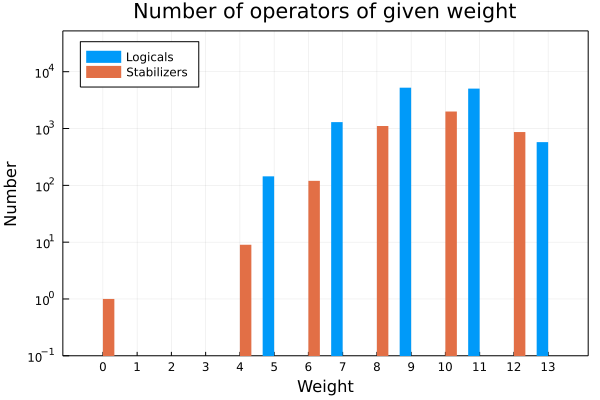

In [8]:
operator_weights_plot(bigger_code_weights)